In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
import mplcyberpunk
plt.style.use("cyberpunk")


In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.rename(columns={"Annual Income (k$)": 'annual_income','Spending Score (1-100)':'Spending_score'},inplace=True)
df.head()

,CustomerID,Gender,Age,annual_income,Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


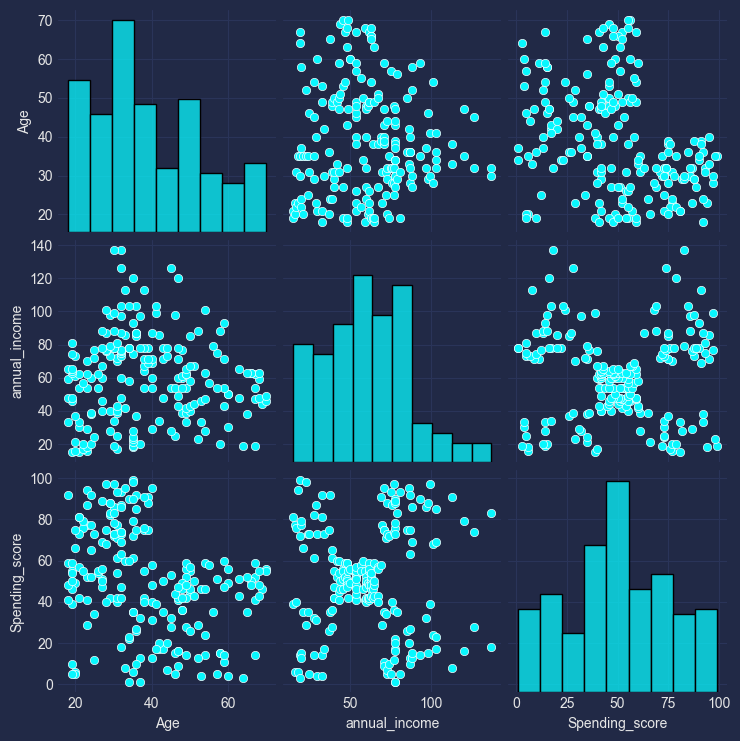

In [9]:
sns.pairplot(df[['Age','annual_income','Spending_score']])


Text(0.5, 0, 'Spending score ')

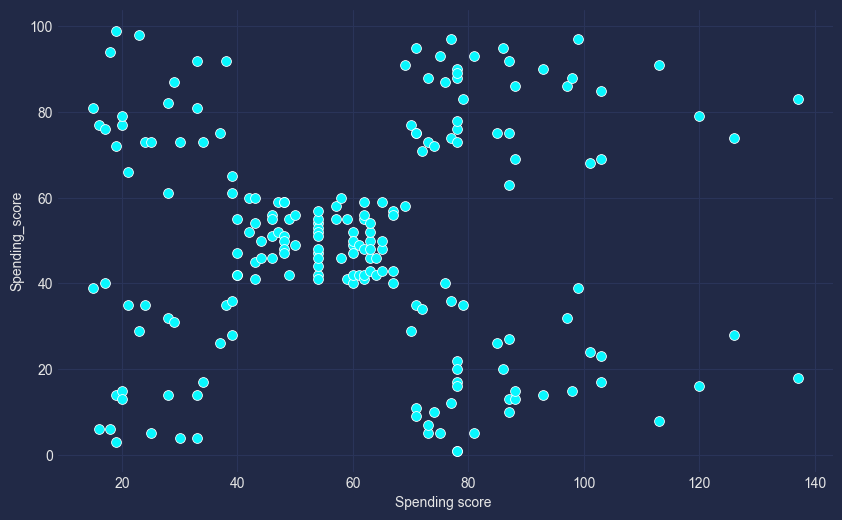

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['annual_income'],y=df['Spending_score'],s=50)
plt.xlabel("Annual income")
plt.xlabel("Spending score ")


In [11]:
#elbo methods
X = df[['annual_income','Spending_score']]
wcss = []
for i in range(1,11) :
    Kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)


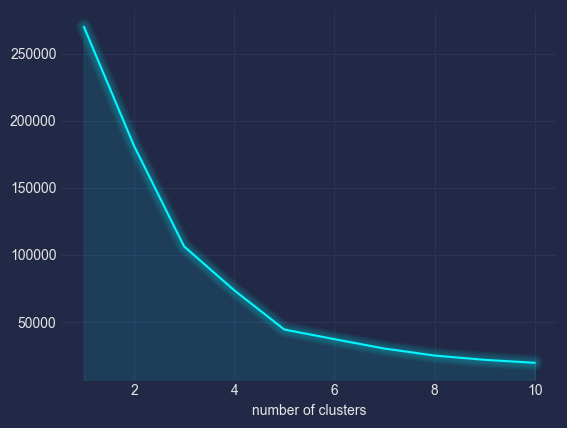

In [12]:
plt.plot(range(1,11),wcss)
plt.xlabel('number of clusters')

mplcyberpunk.make_lines_glow()
mplcyberpunk.add_underglow(alpha_underglow=0.1)

In [13]:
Kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans =Kmeans.fit_predict(X)

In [14]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [15]:
df['cluster'] = y_kmeans

In [16]:
df

,CustomerID,Gender,Age,annual_income,Spending_score,cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


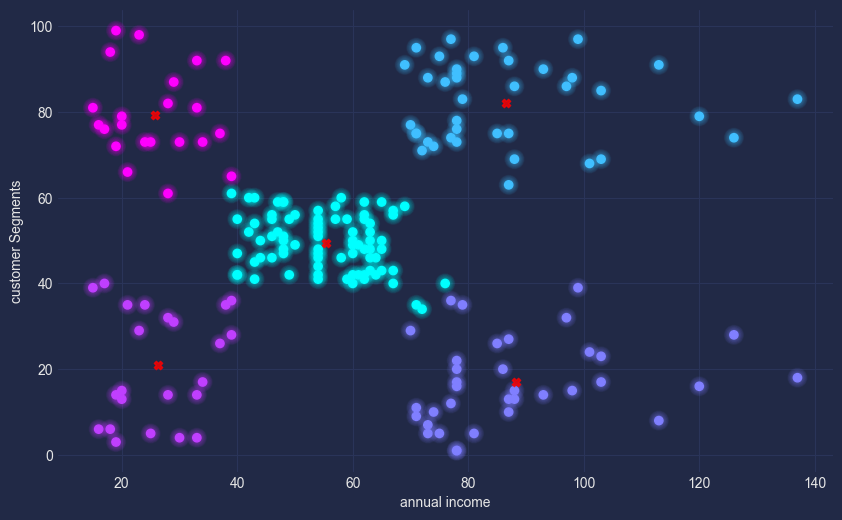

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=df['cluster'],cmap='cool')
mplcyberpunk.make_scatter_glow(alpha=0.5)
centers = Kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',alpha=0.80,marker='X')
plt.xlabel('annual income')
plt.ylabel('customer Segments')
plt.show()




In [18]:
def first_mode(series):
    return series.mode()[0] if not series.mode().empty else None

# Utilisation du groupby avec la fonction first_mode
segments = df.groupby('cluster').agg({
    "CustomerID": 'count',
    "Age": [first_mode,'mean','std'],  # Appliquer first_mode à Age
    "annual_income": [first_mode,'mean','std'],  # Appliquer first_mode à annual_income
    "Spending_score": [first_mode,'mean','std'] })

In [19]:
segments

CustomerID        Age                       annual_income             \
             count first_mode       mean        std    first_mode       mean   
cluster                                                                        
0               81         19  42.716049  16.447822            54  55.296296   
1               39         32  32.692308   3.728650            78  86.538462   
2               35         34  41.114286  11.341676            78  88.200000   
3               23         35  45.217391  13.228607            19  26.304348   
4               22         21  25.272727   5.257030            19  25.727273   

                   Spending_score                        
               std     first_mode       mean        std  
cluster                                                  
0         8.988109             42  49.518519   6.530909  
1        16.312485             75  82.128205   9.364489  
2        16.399067              5  17.114286   9.952154  
3         7.893811             14  20.913043  13.017167  
4         7.566731             73  79.363636  10.504174

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

<Figure size 1500x1500 with 0 Axes>

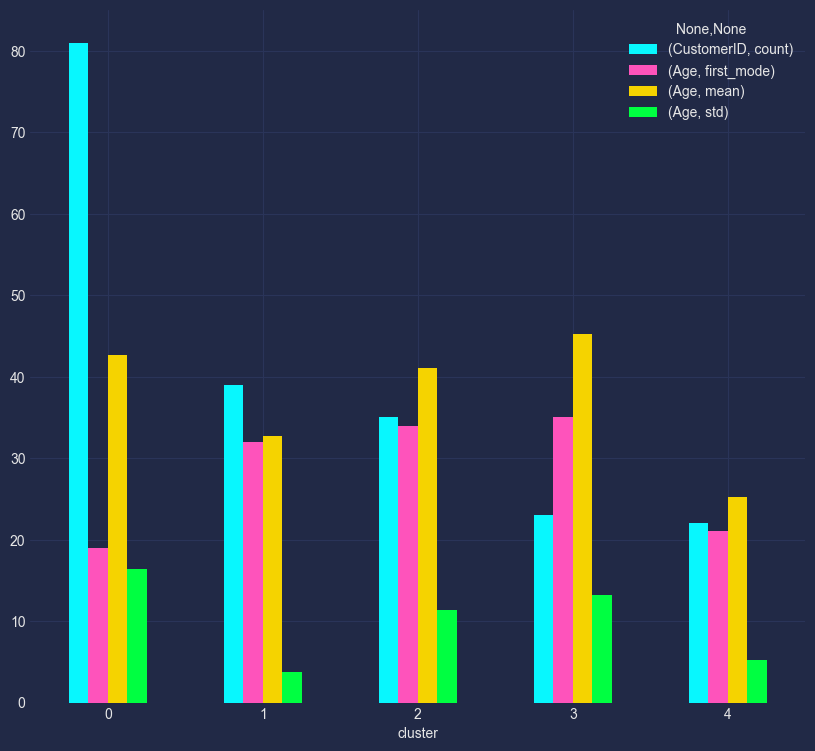

In [20]:
plt.figure(figsize=(15,15))
bars = segments[['CustomerID','Age']].plot(kind='bar',figsize=(10,9),style='Pastel')
plt.xticks(rotation =0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

<Figure size 1000x1500 with 0 Axes>

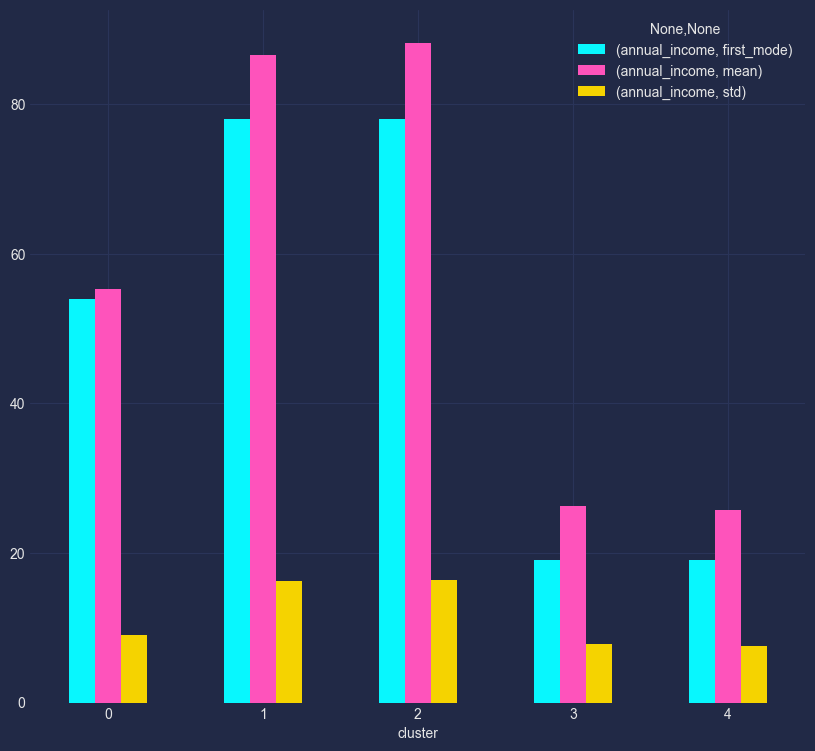

In [21]:
plt.figure(figsize=(10,15))
segments[[	'annual_income']].plot(kind='bar',figsize=(10,9),style='Pastel')
plt.xticks(rotation =0)
